In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

# Gather parameters: warped, left_fitx, right_fitx, ploty, Minv
warped = cv2.imread('warped.png', 0)
undist = cv2.imread('thresholded_images/input_5.png')
params = pickle.load(open('poly-fit.p', 'rb'))
left_fitx = params['left_fitx']
right_fitx = params['right_fitx']
ploty = params['ploty']
transform_params = pickle.load(open('topdown_transform.p', 'rb'))
Minv = transform_params['Minv']

In [87]:
def draw(undist, left_fitx, right_fitx, ploty, Minv):
    # Create an image to draw the lines on
    color_warp = np.zeros_like(undist).astype(np.uint8)

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (undist.shape[1], undist.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    plt.imshow(result)
    cv2.imwrite('transform/lane_proj.png', result)

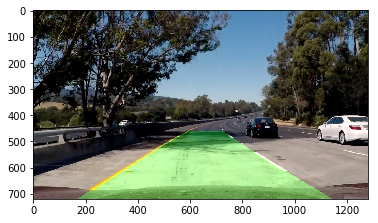

In [88]:
draw(undist, left_fitx, right_fitx, ploty, Minv)